# Chapter 5 Practice Answers

In [3]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from watermark import watermark
from sklearn.metrics import mean_squared_error
from causalgraphicalmodels import CausalGraphicalModel

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
%load_ext watermark
%watermark

Last updated: 2024-07-01T11:39:33.623524-04:00

Python implementation: CPython
Python version       : 3.9.18
IPython version      : 8.17.2

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 141 Stepping 1, GenuineIntel
CPU cores   : 12
Architecture: 64bit



In [3]:
%watermark --iversions

arviz     : 0.16.1
pandas    : 2.1.3
matplotlib: 3.8.2
numpy     : 1.25.2
pymc      : 5.9.2



# 5M1 Question
Invent your own example of a spurious correlation. An outcome variable should be correlated
with both predictor variables. But when both predictors are entered in the same model, the correlation
between the outcome and one of the predictors should mostly vanish (or at least be greatly reduced).

In [4]:
n=100
x = np.random.normal(0, 2, size=n)
x_spur = np.random.normal(x, size=n)
y = np.random.normal(x, size=n)

In [5]:
with pm.Model() as m5m1_a:
    a = pm.Normal('a',0,1)
    b1 = pm.Normal('b1', 0,1)
    sigma = pm.Exponential('sigma', 1)
    mu = a + b1*x
    height = pm.Normal("y", mu=mu, sigma=sigma, observed=y)
    m5m1_a_trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b1, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.


In [6]:
with pm.Model() as m5m1_b:
    a = pm.Normal('a',0,1)
    b2 = pm.Normal('b2', 0,1)
    sigma = pm.Exponential('sigma', 1)
    mu = a + b2*x_spur
    height = pm.Normal("y", mu=mu, sigma=sigma, observed=y)
    m5m1_b_trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b2, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.


In [7]:
with pm.Model() as m5m1_c:
    a = pm.Normal('a',0,1)
    b1 = pm.Normal('b1', 0,1)
    b2 = pm.Normal('b2', 0,1)
    sigma = pm.Exponential('sigma', 1)
    mu = a + b1*x + b2*x_spur 
    height = pm.Normal("y", mu=mu, sigma=sigma, observed=y)
    m5m1_c_trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b1, b2, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

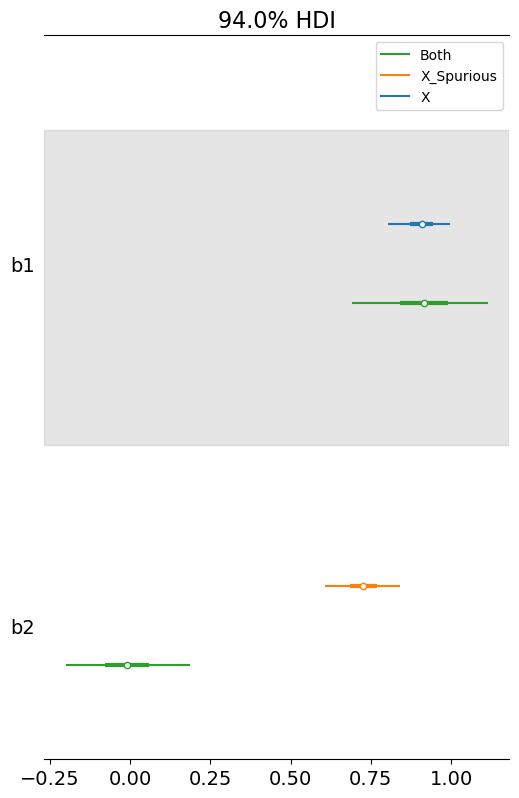

In [8]:
az.plot_forest(
    [
        m5m1_a_trace,
        m5m1_b_trace,
        m5m1_c_trace
    ],
    model_names=['X', 'X_Spurious', 'Both'],
    var_names=['b1','b2'],
    combined=True
)

As expected, the b2 coefficient moves closer to zero when both variables are included in the model

# 5M2 Question
Invent your own example of a masked relationship. An outcome variable should be correlated
with both predictor variables, but in opposite directions. And the two predictor variables should be
correlated with one another

In [9]:
n=100
x = np.random.normal(0, 2, size=n)
x2 = np.random.normal(x, size=n)
y = np.random.normal(x - x2, size=n)

In [10]:
with pm.Model() as m_5m2_a:
    a = pm.Normal('a',0,1)
    b1 = pm.Normal('b1', 0,1)
    sigma = pm.Exponential('sigma', 1)
    mu = a + b1*x
    height = pm.Normal("y", mu=mu, sigma=sigma, observed=y)
    m_5m2_a_trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b1, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


In [11]:
with pm.Model() as m_5m2_b:
    a = pm.Normal('a',0,1)
    b2 = pm.Normal('b2', 0,1)
    sigma = pm.Exponential('sigma', 1)
    mu = a + b2*x2
    height = pm.Normal("y", mu=mu, sigma=sigma, observed=y)
    m_5m2_b_trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b2, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


In [12]:
with pm.Model() as m_5m2_c:
    a = pm.Normal('a',0,1)
    b1 = pm.Normal('b1', 0,1)
    b2 = pm.Normal('b2', 0,1)
    sigma = pm.Exponential('sigma', 1)
    mu = a + b1*x + b2*x2 
    height = pm.Normal("y", mu=mu, sigma=sigma, observed=y)
    m_5m2_c_trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b1, b2, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

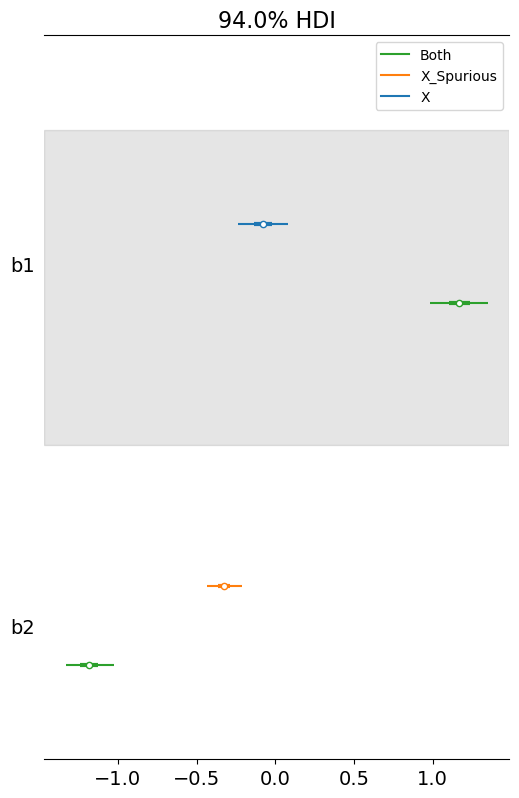

In [13]:
az.plot_forest(
    [
        m_5m2_a_trace,
        m_5m2_b_trace,
        m_5m2_c_trace
    ],
    model_names=['X', 'X_Spurious', 'Both'],
    var_names=['b1','b2'],
    combined=True
)

We can see that in the model that includes both predictors, the coefficients are the opposite of eather other, one is postive and one is negative.

# 5M3 Question
It is sometimes observed that the best predictor of fire risk is the presence of firefighters—
States and localities with many firefighters also have more fires. Presumably firefighters do not cause
fires. Nevertheless, this is not a spurious correlation. Instead fires cause firefighters. Consider the
same reversal of causal inference in the context of the divorce and marriage data. How might a high
divorce rate cause a higher marriage rate? Can you think of a way to evaluate this relationship, using
multiple regression?

# 5M4 Question
In the divorce data, States with high numbers of members of the Church of Jesus Christ of
Latter-day Saints (LDS) have much lower divorce rates than the regression models expected. Find a
list of LDS population by State and use those numbers as a predictor variable, predicting divorce rate
using marriage rate, median age at marriage, and percent LDS population (possibly standardized).
You may want to consider transformations of the raw percent LDS variable

In [4]:
divorce = pd.read_csv('./data/WaffleDivorce.csv',sep=';')
divorce.head()

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage SE,Divorce,Divorce SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
0,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
1,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
2,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
3,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
4,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00


In [5]:
lds_stats = pd.read_csv('./data/lds_stats.csv')
lds_stats['LDS_pct'] = np.round(lds_stats['Members'] / lds_stats['Population'],3)
lds_stats = lds_stats.rename(columns={'State':'Location'})
lds_stats.head()

,Location,Members,Population,LDS_pct
0,Alabama,39832.0,5074296.0,0.008
1,Alaska,33574.0,733583.0,0.046
2,Arizona,439411.0,7359197.0,0.060
3,Arkansas,35405.0,3045637.0,0.012
4,California,728995.0,39029342.0,0.019


In [6]:
divorce_lds = divorce.merge(lds_stats, on='Location')
divorce_lds.head()

,Location,Loc,Population_x,MedianAgeMarriage,Marriage,Marriage SE,Divorce,Divorce SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860,Members,Population_y,LDS_pct
0,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45,39832.0,5074296.0,0.008
1,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00,33574.0,733583.0,0.046
2,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00,439411.0,7359197.0,0.060
3,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26,35405.0,3045637.0,0.012
4,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00,728995.0,39029342.0,0.019


In [15]:
training_data = divorce_lds[['Location','Loc','MedianAgeMarriage', 'Divorce','Marriage','LDS_pct','South']].copy()
training_data.head()

,Location,Loc,MedianAgeMarriage,Divorce,Marriage,LDS_pct,South
0,Alabama,AL,25.3,12.7,20.2,0.008,1
1,Alaska,AK,25.2,12.5,26.0,0.046,0
2,Arizona,AZ,25.8,10.8,20.3,0.060,0
3,Arkansas,AR,24.3,13.5,26.4,0.012,1
4,California,CA,26.8,8.0,19.1,0.019,0


In [16]:
training_data['MedAgeStd'] = (training_data['MedianAgeMarriage'] - training_data['MedianAgeMarriage'].mean())/training_data['MedianAgeMarriage'].std()
training_data['DivorceStd'] = (training_data['Divorce'] - training_data['Divorce'].mean())/training_data['Divorce'].std()
training_data['MarriageStd'] = (training_data['Marriage'] - training_data['Marriage'].mean())/training_data['Marriage'].std()
training_data['LDSStd'] = (training_data['LDS_pct'] - training_data['LDS_pct'].mean())/training_data['LDS_pct'].std()
training_data.head()

,Location,Loc,MedianAgeMarriage,Divorce,Marriage,LDS_pct,South,MedAgeStd,DivorceStd,MarriageStd,LDSStd
0,Alabama,AL,25.3,12.7,20.2,0.008,1,-0.606290,1.654205,0.022644,-0.262656
1,Alaska,AK,25.2,12.5,26.0,0.046,0,-0.686699,1.544364,1.549802,0.134042
2,Arizona,AZ,25.8,10.8,20.3,0.060,0,-0.204241,0.610716,0.048974,0.280194
3,Arkansas,AR,24.3,13.5,26.4,0.012,1,-1.410387,2.093569,1.655123,-0.220898
4,California,CA,26.8,8.0,19.1,0.019,0,0.599857,-0.927058,-0.266989,-0.147822


In [19]:
with pm.Model() as m_5m4_a:
    a = pm.Normal('a', 0, 1)
    b_m = pm.Normal('b_m', 0,0.5)
    b_age = pm.Normal('b_age', 0,0.5)
    b_lds = pm.Normal('b_lds',0,0.5)
    sigma = pm.Exponential('sigma',1)
    mu = a + b_m * training_data['MarriageStd'] + b_age * training_data['MedAgeStd'] + b_lds * training_data['LDSStd']
    divorce = pm.Normal('divorce', mu, sigma, observed=training_data['Divorce'])
    m_5m4_a_trace = pm.sample()                    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b_m, b_age, b_lds, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.


In [20]:
az.summary(m_5m4_a_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,9.266,0.231,8.823,9.680,0.004,0.003,3236.0,2315.0,1.0
b_m,0.155,0.257,-0.329,0.634,0.005,0.004,2970.0,2838.0,1.0
b_age,-0.997,0.260,-1.447,-0.475,0.005,0.003,2954.0,2649.0,1.0
b_lds,-0.431,0.229,-0.861,-0.007,0.004,0.003,3558.0,2772.0,1.0
sigma,1.499,0.178,1.173,1.816,0.003,0.002,3062.0,2383.0,1.0


In [21]:
with pm.Model() as m_5m4_b:
    a = pm.Normal('a', 0, 1)
    b_m = pm.Normal('b_m', 0,0.5)
    b_age = pm.Normal('b_age', 0,0.5)
    sigma = pm.Exponential('sigma',1)
    mu = a + b_m * training_data['MarriageStd'] + b_age * training_data['MedAgeStd']
    divorce = pm.Normal('divorce', mu, sigma, observed=training_data['Divorce'])
    m_5m4_b_trace = pm.sample()     

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b_m, b_age, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


In [22]:
az.summary(m_5m4_b_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,9.221,0.243,8.753,9.667,0.005,0.003,2549.0,2233.0,1.0
b_m,0.035,0.256,-0.455,0.494,0.005,0.004,3037.0,2987.0,1.0
b_age,-0.886,0.257,-1.373,-0.412,0.005,0.003,2806.0,2692.0,1.0
sigma,1.586,0.189,1.258,1.928,0.004,0.003,2855.0,2771.0,1.0


Text(0, 0.5, 'Predicted')

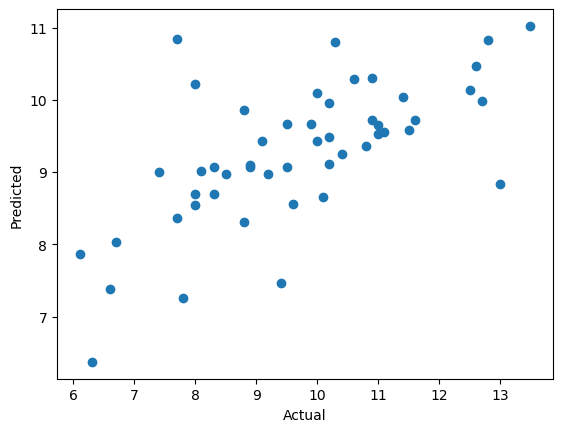

In [23]:
predictions_m_5m4_a = (m_5m4_a_trace['posterior']['a'].mean().item(0) + 
                       (m_5m4_a_trace['posterior']['b_m'].mean().item(0) * training_data['MarriageStd']) + 
                       (m_5m4_a_trace['posterior']['b_age'].mean().item(0) * training_data['MedAgeStd']) + 
                       (m_5m4_a_trace['posterior']['b_lds'].mean().item(0) * training_data['LDSStd'])
)
plt.scatter(training_data['Divorce'], predictions_m_5m4_a)
plt.xlabel('Actual')
plt.ylabel('Predicted')

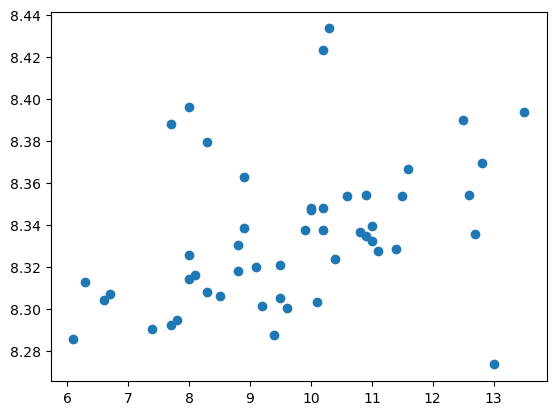

In [24]:
predictions_m_5m4_b = (m_5m4_b_trace['posterior']['a'].mean().item(0) + 
                       (m_5m4_b_trace['posterior']['b_m'].mean().item(0) * training_data['MarriageStd']) + 
                       (m_5m4_b_trace['posterior']['b_age'].mean().item(0))
)
plt.scatter(training_data['Divorce'], predictions_m_5m4_b)

In [25]:
mean_squared_error(training_data['Divorce'], predictions_m_5m4_a), mean_squared_error(training_data['Divorce'], predictions_m_5m4_b)

(2.056449803332794, 5.0335984645291925)

Looking at the mean squared error, the model with the LDS population percentage data performs better than the one without the LDS data.  This can be seen in the plots of the residuals versus the actuals as well, as the model with the LDS population information has points that are closer to the diagnol

# 5M5 Question
One way to reason through multiple causation hypotheses is to imagine detailed mechanisms
through which predictor variables may influence outcomes. For example, it is sometimes argued that
the price of gasoline (predictor variable) is positively associated with lower obesity rates (outcome
variable). However, there are at least two important mechanisms by which the price of gas could
reduce obesity. First, it could lead to less driving and therefore more exercise. Second, it could lead to
less driving, which leads to less eating out, which leads to less consumption of huge restaurant meals.
Can you outline one or more multiple regressions that address these two mechanisms? Assume you
can have any predictor data you need.

GP: Gas Price
 
DR: Driving Rate

E: Amount of Exercise

O: Obesity Rate

EO: Eating Out

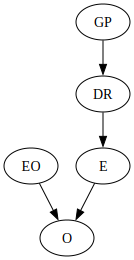

In [26]:
m1 = CausalGraphicalModel(
    nodes = ['GP','DR','E','O','EO'],
    edges =[
        ('GP', 'DR'),
        ('DR','E'),
        ('E','O'),
        ('EO','O')
    ])
    
m1.draw()

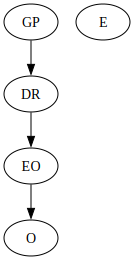

In [27]:
m1 = CausalGraphicalModel(
    nodes = ['GP','DR','E','O','EO'],
    edges =[
        ('GP', 'DR'),
        ('DR','EO'),
        ('EO','O')
    ])
    
m1.draw()

# 5H1 Question
In the divorce example, suppose the DAG is: M → A → D. What are the implied conditional
independencies of the graph? Are the data consistent with it?

In [28]:
#m-> a -> d
with pm.Model() as m_5h1:
    a = pm.Normal('a', 0, 1)
    b_m = pm.Normal('b_m', 0,0.5)
    b_age = pm.Normal('b_age', 0,0.5)
    sigma = pm.Exponential('sigma',1)
    mu = a + b_m * training_data['MarriageStd'] + b_age * training_data['MedAgeStd']
    divorce = pm.Normal('divorce', mu, sigma, observed=training_data['Divorce'])
    m_5h1_trace = pm.sample()     

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b_m, b_age, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.


In [29]:
az.summary(m_5h1_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,9.226,0.235,8.752,9.644,0.004,0.003,3282.0,2138.0,1.0
b_m,0.034,0.265,-0.456,0.525,0.005,0.004,2663.0,2708.0,1.0
b_age,-0.885,0.269,-1.405,-0.396,0.005,0.004,2528.0,2709.0,1.0
sigma,1.583,0.181,1.261,1.925,0.004,0.003,2775.0,2747.0,1.0


Based on the graph, we would expect that the affect of Marriage on Divorce is mediated through Age, removing the influence of Marriage on Divorce.  This is what we see in the model, where the coefficient of marriage (b_m) is close to 0.

# 5H2 Question
Assuming that the DAG for the divorce example is indeed M → A → D, fit a new model and
use it to estimate the counterfactual effect of halving a State’s marriage rate M. Use the counterfactual
example from the chapter (starting on page 140) as a template

In [30]:
with pm.Model() as m_5h2:
    #m -> a
    a_a = pm.Normal('a_a', 0, 1)
    b_a = pm.Normal('b_a', 0,0.5)
    sigma_a = pm.Exponential('sigma_a',1)
    mu_a = a_a + b_a * training_data['MarriageStd']
    age = pm.Normal('AgeMarriage', mu_a, sigma_a, observed=training_data['MedAgeStd'])
    
    #a -> d
    a_d = pm.Normal('a_d', 0, 1)
    b_d = pm.Normal('b_d', 0,0.5)
    sigma_d = pm.Exponential('sigma_d',1)
    mu_d = a_d + b_d * training_data['MedAgeStd']
    divorce = pm.Normal('divorce', mu_d, sigma_d, observed=training_data['DivorceStd'])
    
    m_5h2_trace = pm.sample()     

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_a, b_a, sigma_a, a_d, b_d, sigma_d]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.


In [31]:
az.summary(m_5h2_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_a,0.001,0.100,-0.187,0.185,0.002,0.001,3733.0,3161.0,1.0
b_a,-0.694,0.100,-0.879,-0.501,0.001,0.001,4662.0,3611.0,1.0
a_d,0.000,0.118,-0.220,0.223,0.002,0.002,4820.0,3109.0,1.0
b_d,-0.567,0.115,-0.795,-0.365,0.002,0.001,5035.0,3270.0,1.0
sigma_a,0.714,0.076,0.585,0.861,0.001,0.001,4433.0,2912.0,1.0
sigma_d,0.824,0.085,0.665,0.980,0.001,0.001,5731.0,3445.0,1.0


In [32]:
training_data['MarriageStd'].min(),training_data['MarriageStd'].max()

(-1.7414862240155486, 2.787325849323946)

In [33]:
mar_seq = np.linspace(-3,3,50)
a_a_values = m_5h2_trace['posterior']['a_a'][0]
b_a_values = m_5h2_trace['posterior']['b_a'][0]
a_predictions = np.zeros((len(mar_seq), len(a_a_values)))

In [34]:
for i, value in enumerate(mar_seq):
    a_predictions[i] = a_a_values + (b_a_values * value)

In [35]:
a_predictions_mean = a_predictions.mean(1)
a_predictions_hdi = az.hdi(a_predictions_mean.T)

d:\Python\venv\pymc_env\lib\site-packages\arviz\plots\hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


Text(0, 0.5, 'Median Age')

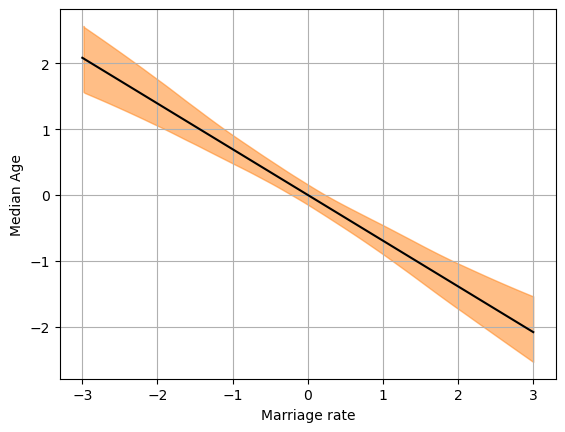

In [36]:
ax = az.plot_hdi(mar_seq, a_predictions.T, hdi_prob=0.89)
plt.plot(mar_seq, a_predictions_mean, color='black')
plt.grid()
plt.xlabel("Marriage rate")
plt.ylabel("Median Age")

In [37]:
a_d_values = m_5h2_trace['posterior']['a_d'][0]
b_d_values = m_5h2_trace['posterior']['b_d'][0]
d_predictions = np.zeros((len(a_predictions_mean), len(a_d_values)))

In [38]:
for i, value in enumerate(a_predictions_mean):
    d_predictions[i] = a_d_values + (b_d_values * value)

In [39]:
d_predictions_mean = d_predictions.mean(1)
d_predictions_hdi = az.hdi(d_predictions_mean.T)

In [40]:
half_mar_rate = training_data['Marriage'].mean() / 2
half_mar_rate_std = (10 - training_data['Marriage'].mean())/training_data['Marriage'].std() 
half_mar_rate_std

-2.663046820334632

d:\Python\venv\pymc_env\lib\site-packages\arviz\plots\hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


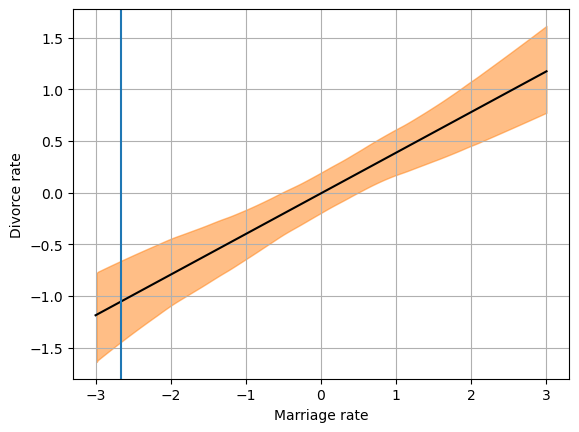

In [41]:
ax = az.plot_hdi(mar_seq, d_predictions.T, hdi_prob=0.89)
plt.plot(mar_seq,  d_predictions_mean, color='black')
plt.grid()
plt.xlabel("Marriage rate")
plt.ylabel("Divorce rate")
ax.axvline(half_mar_rate_std)

Halving a the marriage rate would decrease the divorce rate by about 1 standard deviation

# 5H3 Question

Return to the milk energy model, m5.7. Suppose that the true causal relationship among the variables is:

M -> N -> K \
M -> K

Now compute the counterfactual effect on K of doubling M. You will need to account for both the
direct and indirect paths of causation. Use the counterfactual example from the chapter (starting on
page 140) as a template.

In [42]:
milk_data = pd.read_csv('./data/milk.csv', delimiter=";")
milk_data.head()

,clade,species,kcal.per.g,perc.fat,perc.protein,perc.lactose,mass,neocortex.perc
0,Strepsirrhine,Eulemur fulvus,0.49,16.60,15.42,67.98,1.95,55.16
1,Strepsirrhine,E macaco,0.51,19.27,16.91,63.82,2.09,NaN
2,Strepsirrhine,E mongoz,0.46,14.11,16.85,69.04,2.51,NaN
3,Strepsirrhine,E rubriventer,0.48,14.91,13.18,71.91,1.62,NaN
4,Strepsirrhine,Lemur catta,0.60,27.28,19.50,53.22,2.19,NaN


In [43]:
milk_data["k"] = milk_data["kcal.per.g"]
milk_data["K_std"] = (milk_data["kcal.per.g"] - milk_data["kcal.per.g"].mean())/milk_data["kcal.per.g"].std()
milk_data["N"] = (milk_data["neocortex.perc"] - milk_data["neocortex.perc"].mean())/milk_data["neocortex.perc"].std()
milk_data["M"] = (milk_data["mass"] - milk_data["mass"].mean())/milk_data["mass"].std()
milk_training = milk_data[['k','K_std','N','M']].dropna()

In [44]:
with pm.Model() as m_5h3:
    a_m = pm.Normal('a_m',0,0.5)
    b_m = pm.Normal('b_m',0,0.5)
    sigma_m = pm.Exponential('sigma_m', 1)
    mu_m = a_m + b_m * milk_training['M']
    n = pm.Normal('n',mu=mu_m, sigma=sigma_m, observed=milk_training['N'])
    
    a_k = pm.Normal('a_k',0,0.5)
    b_n_k = pm.Normal('b_n_k',0,0.5)
    b_m_k = pm.Normal('b_m_k',0,0.5)
    sigma_k = pm.Exponential('sigma_k', 1)
    mu_k = a_k + b_n_k * milk_training['N'] + b_m_k * milk_training['M']
    k = pm.Normal('k',mu=mu_k, sigma=sigma_k, observed=milk_training['K_std'])
    m_5h3_trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_m, b_m, sigma_m, a_k, b_n_k, b_m_k, sigma_k]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


In [45]:
az.summary(m_5h3_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_m,-0.037,0.193,-0.398,0.333,0.003,0.003,4588.0,2919.0,1.0
b_m,0.535,0.211,0.144,0.935,0.003,0.002,4526.0,2520.0,1.0
a_k,0.112,0.215,-0.285,0.535,0.003,0.003,4344.0,2765.0,1.0
b_n_k,0.379,0.253,-0.088,0.850,0.004,0.003,3868.0,3351.0,1.0
b_m_k,-0.512,0.270,-0.994,0.010,0.004,0.003,4129.0,3201.0,1.0
sigma_m,0.859,0.168,0.579,1.181,0.003,0.002,4346.0,3056.0,1.0
sigma_k,0.982,0.199,0.640,1.326,0.003,0.003,3587.0,2875.0,1.0


In [46]:
M_seq = np.linspace(-2,2,30)
a_m_values = m_5h3_trace['posterior']['a_m'][0]
b_m_values = m_5h3_trace['posterior']['b_m'][0]
N_predictions = np.zeros((len(M_seq), len(a_m_values)))

In [47]:
for i, value in enumerate(M_seq):
    N_predictions[i] = a_m_values + (b_m_values * value)

In [48]:
N_predictions_mean = N_predictions.mean(1)
N_predictions_hdi = az.hdi(N_predictions_mean.T)

d:\Python\venv\pymc_env\lib\site-packages\arviz\plots\hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


Text(0, 0.5, 'Neocortext Pct')

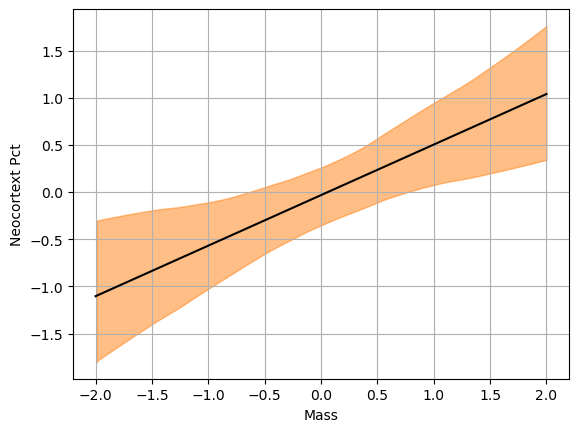

In [49]:
ax = az.plot_hdi(M_seq, N_predictions.T, hdi_prob=0.89)
plt.plot(M_seq,  N_predictions_mean, color='black')
plt.grid()
plt.xlabel("Mass")
plt.ylabel("Neocortext Pct")

In [50]:
a_k_values = m_5h3_trace['posterior']['a_k'][0]
b_n_k_values = m_5h3_trace['posterior']['b_n_k'][0]
b_m_k_values = m_5h3_trace['posterior']['b_m_k'][0]
K_predictions = np.zeros((len(N_predictions_mean), len(a_k_values)))

In [51]:
for i, value in enumerate(N_predictions_mean):
    K_predictions[i] = a_k_values + (b_n_k_values * value) + (b_m_k_values * M_seq[i])

In [52]:
K_predictions_mean = K_predictions.mean(1)
K_predictions_hdi = az.hdi(K_predictions_mean.T)

In [53]:
mean_M = milk_data['mass'].mean() 
double_M_std = ((mean_M * 2)- milk_data['mass'].mean())/milk_data['mass'].std() 
mean_M, mean_M*2, double_M_std

(14.726896551724137, 29.453793103448273, 0.5945344174388668)

d:\Python\venv\pymc_env\lib\site-packages\arviz\plots\hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


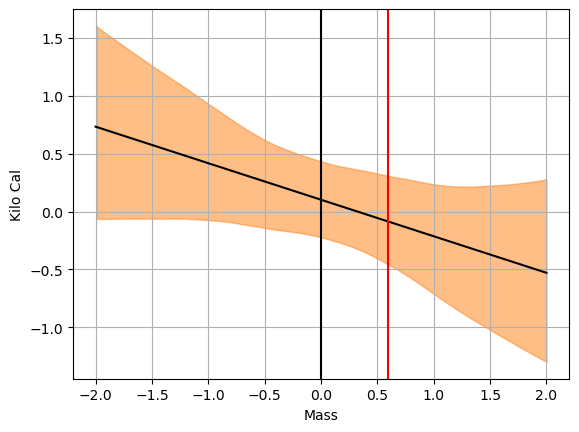

In [54]:
M_res = M_seq * milk_data['mass'].std() + milk_data['mass'].mean()
ax = az.plot_hdi(M_seq, K_predictions.T, hdi_prob=0.89)
plt.plot(M_seq,  K_predictions_mean, color='black')
plt.grid()
plt.xlabel("Mass")
plt.ylabel('Kilo Cal')
#plt.xlim(0)
ax.axvline(0, color='black')
ax.axvline(double_M_std, color='red')

If you look at the difference between the mean mass (z score = 0) and doubling it, the change in K is very small.  It moves from about 0.1 to -0.1, so a drop of about 0.2 z  

# 5H4 Question

5H4. Here is an open practice problem to engage your imagination. In the divorce date, States in
the southern United States have many of the highest divorce rates. Add the South indicator variable
to the analysis. First, draw one or more DAGs that represent your ideas for how Southern American
culture might influence any of the other three variables (D, M or A). Then list the testable implications
of your DAGs, if there are any, and fit one or more models to evaluate the implications. What do you
think the influence of “Southerness” is

In [33]:
region = training_data['South']

In [34]:
with pm.Model() as m_5h4:
    a = pm.Normal("a", 0, 0.2)
    bA = pm.Normal("bA", 0, 0.5)
    bR = pm.Normal("bR", 10, 2, shape=2)
    sigma = pm.Exponential("sigma", 1)
    mu = bA * training_data["MedAgeStd"].values + bR[region]
    divorce = pm.Normal('divorce', mu = mu, sigma = sigma, observed=training_data['Divorce'].values)
    m_5h4_trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, bA, bR, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


In [35]:
az.summary(m_5h4_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.001,0.202,-0.381,0.365,0.003,0.003,5466.0,3422.0,1.0
bA,-0.840,0.201,-1.208,-0.464,0.003,0.002,4572.0,3029.0,1.0
bR[0],9.431,0.242,8.962,9.876,0.003,0.002,5060.0,3028.0,1.0
bR[1],10.347,0.397,9.607,11.099,0.006,0.004,4778.0,3374.0,1.0
sigma,1.461,0.154,1.200,1.766,0.002,0.002,4747.0,3088.0,1.0


In [36]:
#Compare to model with only Median Marriage Age
with pm.Model() as m_5h4_b:
    a = pm.Normal('a', 0, 1)
    bA = pm.Normal('b_age', 0,0.5)
    sigma = pm.Exponential('sigma',1)
    mu = a + bA * training_data['MedAgeStd']
    divorce = pm.Normal('divorce', mu, sigma, observed=training_data['Divorce'])
    m_5h4_b_trace = pm.sample()     

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b_age, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


In [37]:
az.summary(m_5h4_b_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,9.226,0.241,8.766,9.655,0.004,0.003,3181.0,2365.0,1.0
b_age,-0.903,0.210,-1.301,-0.508,0.003,0.002,4714.0,2913.0,1.0
sigma,1.576,0.183,1.257,1.925,0.003,0.003,2852.0,2700.0,1.0


I really only wanted to check one thing, and that was the theory that southerness influences the median age of marriage, which would be inversely related to the divorce rate (e.g. as the median age went up, the divorce rate would go down).  The coeffecient for age weaker in the model without the region variable in it, which indicates southerness could explain some of how median age drives divorce rate,     